In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

min_wavelength: float = 0.000_000_2
max_wavelength: float = 0.000_002_5

In [2]:
def Planck(wavelength: np.ndarray, temperature: float, h: float = 6.62e-34, boltzmann: float = 1.38e-23, speed_of_light: float = 3e8) -> np.ndarray:
    wavelength_five: np.ndarray = wavelength**5
    exponent_component: np.ndarray = wavelength*temperature*boltzmann
    exponent_minus_one: np.ndarray = np.exp(h*speed_of_light/exponent_component) - 1
    return (8*np.pi*h*speed_of_light/wavelength_five) * (1/exponent_minus_one)

In [3]:
def Wien(wavelength: np.ndarray, temperature: float, h: float = 6.62e-34, boltzmann: float = 1.38e-23, speed_of_light: float=3e8) -> np.ndarray:
    wavelength_five: np.ndarray = wavelength**5
    exponent_component: np.ndarray = wavelength*temperature*boltzmann
    exponent_minus_one: np.ndarray = np.exp(h*speed_of_light/exponent_component)
    return (8*np.pi*h*speed_of_light/wavelength_five) * (1/exponent_minus_one)

In [4]:
def RayleighJeans(wavelength: np.ndarray, temperature: float, h: float=6.62e-34, boltzmann: float = 1.38e-23, speed_of_light: float = 3e8) -> np.ndarray:
    wavelength_four: np.ndarray = wavelength**4
    numerator: float = boltzmann*temperature
    return 8*np.pi * numerator / wavelength_four

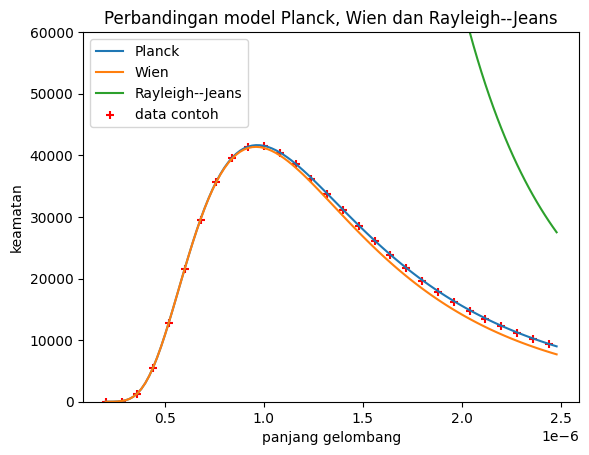

In [18]:
wavelength: np.ndarray = np.arange(min_wavelength, max_wavelength, step=0.2e-7)
temperature: float = 3_000

plt.plot(wavelength, Planck(wavelength, temperature), label='Planck')
plt.plot(wavelength, Wien(wavelength, temperature), label='Wien')
plt.plot(wavelength, RayleighJeans(wavelength, temperature), label='Rayleigh--Jeans')

wavelength_random: np.ndarray = np.arange(min_wavelength, max_wavelength, step=0.8e-7)

x_rand = Planck(wavelength_random, temperature) + np.random.default_rng(200).integers(low=-100, high=100)

plt.scatter(wavelength_random, x_rand, label='data contoh', marker='+', color='red')

plt.ylim(0, 60_000)

plt.title('Perbandingan model Planck, Wien dan Rayleigh--Jeans')
plt.xlabel('panjang gelombang')
plt.ylabel('keamatan')
plt.legend()
plt.show()

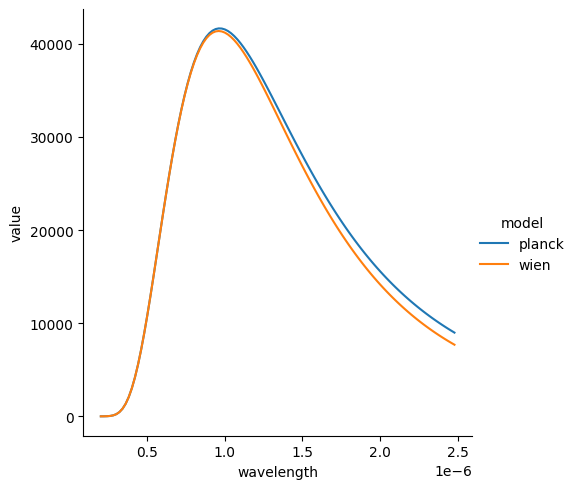

In [20]:
data: pd.DataFrame = pd.DataFrame(
    {
        "wavelength": wavelength, 
        "planck": Planck(wavelength, temperature), 
        "wien": Wien(wavelength, temperature),
        # "rayleigh-jeans":RayleighJeans(wavelength, temperature), 
        # "noisy": wavelength_random,
    }
)

data = data.melt(id_vars=['wavelength'], var_name='model')
sns.relplot(data=data, x='wavelength', y='value', hue='model', kind='line')

In [ ]:
temperatures: np.ndarray = np.arange(100, 7_000, step=100)

def sesaran_Wien(temperature: np.ndarray, constant: float = 2.8978e-3) -> np.ndarray:
    return constant / temperature